In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import jax
# jax.config.update("jax_enable_x64", True)

import jax.numpy as jnp
import jax.random as jr
from jax.tree_util import Partial

import hugegp as gp
import hugegp_cuda as hgc
import jaxkd as jk

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
from tqdm import tqdm

rng = jr.key(137)

In [ ]:
rng, key = jr.split(rng)
points = jr.normal(key, shape=(100_000, 2))
offsets = gp.make_offsets(len(points), 1000, 1.3, 5000)
points, neighbors, indices = gp.build_jax_graph(points, offsets=offsets, k=20, cuda=True)
gp.check_graph(points, neighbors, offsets, indices)

0.09435052


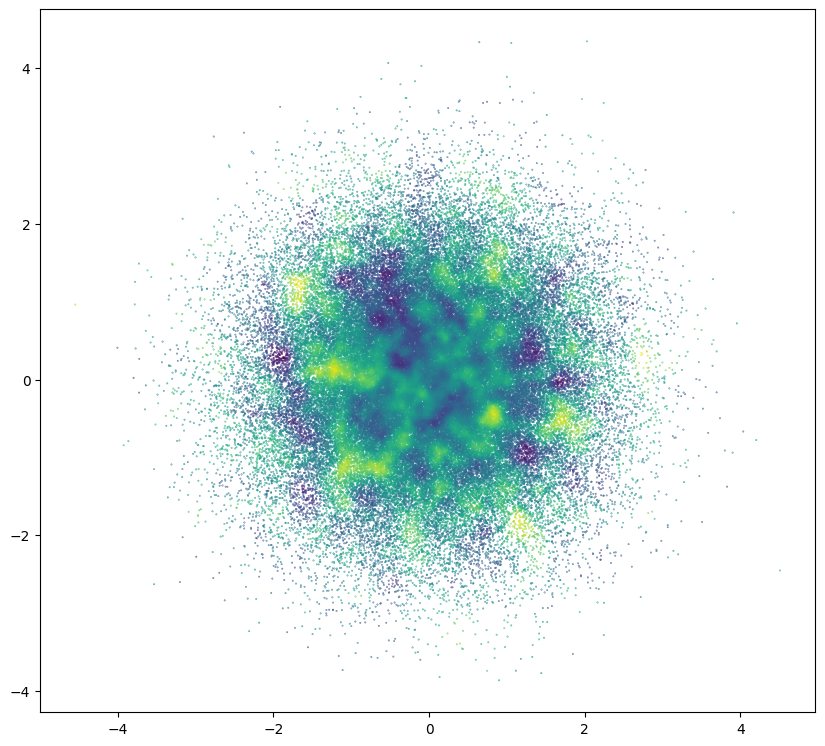

In [25]:
rng, key = jr.split(rng)
xi = jr.normal(key, shape=(len(points),))
values = gp.generate_refine(points, neighbors, offsets, gp.matern_cov, xi)
print(values[0])

plt.figure(figsize=(10, 10))
plt.scatter(*points.T, c=values, s=.1)
plt.gca().set(aspect='equal')
plt.show()

# Compare low number with exact

In [63]:
rng, key = jr.split(rng)
points = jr.normal(key, shape=(5_000, 2))
offsets = gp.make_offsets(len(points), 500, 1.3)
points, neighbors, indices = gp.build_jax_graph(points, offsets=offsets, k=20, cuda=True)
gp.check_graph(points, neighbors, offsets, indices)

In [64]:
rng, key = jr.split(rng)
xi = jr.normal(key, shape=(5_000,))

true_values = gp.generate_dense(points, gp.matern_cov, xi)
values = gp.generate(points, neighbors, offsets, gp.matern_cov, xi)

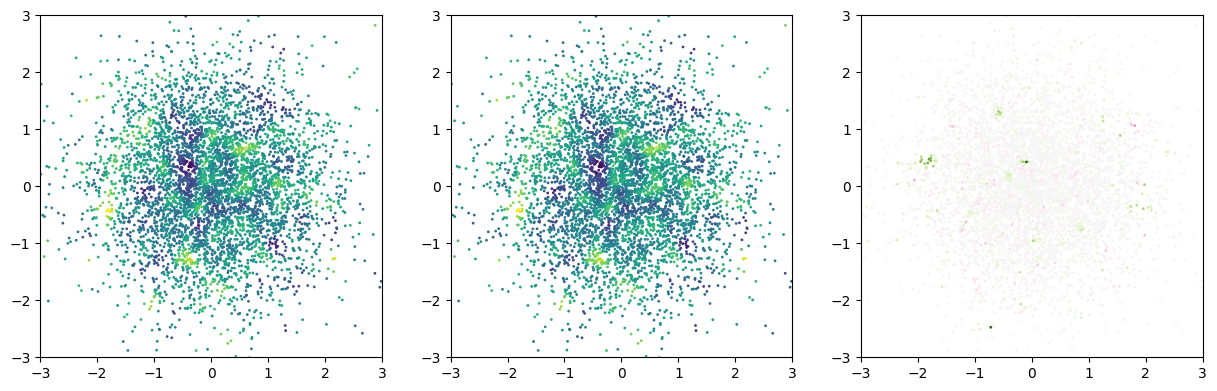

In [65]:
fig, axes = plt.subplots(figsize=(15,5), ncols=3)
axes[0].scatter(*points.T, c=true_values, s=1)
axes[1].scatter(*points.T, c=values, s=1)
axes[2].scatter(*points.T, c=true_values - values, s=1, cmap='PiYG', vmin=-1, vmax=1)
for ax in axes:
    ax.set(aspect='equal', xlim=(-3,3), ylim=(-3,3))
plt.show()